Instructions

toy_dataset = [ ['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'], ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'], ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'], ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]

Run the apriori algorithm on the provided toy_dataset. Interpret the results.
Try to explore the checkpoint dataset using Pandas and Plotly.
Run the apriori algorithm on checkpoint dataset. Interpret the results and suggest a clear business plan to the supermarket owners based on your findings.

#### Apriori Algorithm on Toy Dataset

In [ ]:
!pip install pandas mlxtend 

In [7]:
# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [9]:
# Define the toy dataset  
toy_dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],  
               ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],  
               ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],  
               ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels'],  
               ['Earrings', 'Skirt', 'Scarf', 'Shirt', 'Pants']]  

In [10]:
# Create a DataFrame where each row is a transaction
df_toy = pd.DataFrame(toy_dataset)

In [12]:
# Perform one-hot encoding
basket = pd.get_dummies(df_toy.stack()).groupby(level=0).sum()


In [13]:
# Ensure the basket DataFrame is correctly created  
print("Basket DataFrame:")  
print(basket)  

Basket DataFrame:
   Dress  Earrings  Hat  Heels  Necklace  Pants  Sandals  Scarf  Shirt  Skirt  \
0      0         0    1      0         0      1        0      1      0      1   
1      0         0    1      0         0      1        0      0      0      1   
2      1         0    0      1         0      1        1      1      0      0   
3      1         1    1      1         1      0        0      1      0      0   
4      0         1    0      0         0      1        0      1      1      1   

   Sneakers  Sunglasses  
0         1           0  
1         1           1  
2         0           0  
3         0           0  
4         0           0  


In [14]:
# Check the shape of the DataFrame  
print("Shape of Basket DataFrame:", basket.shape)  

Shape of Basket DataFrame: (5, 12)


In [15]:
# Run Apriori algorithm with adjusted minimum support if needed  
frequent_itemsets = apriori(basket, min_support=0.2, use_colnames=True) 

In [16]:
# Ensure that frequent_itemsets is not empty  
if frequent_itemsets.empty:  
    print("No frequent itemsets found with the given minimum support.")  
else:  
    # Generate the association rules  
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)  
    

In [18]:
# Display results  
print("Frequent Itemsets:")  
print(frequent_itemsets)  
print("\nAssociation Rules:")  
print(rules)

Frequent Itemsets:
     support                                        itemsets
0        0.4                                         (Dress)
1        0.4                                      (Earrings)
2        0.6                                           (Hat)
3        0.4                                         (Heels)
4        0.2                                      (Necklace)
..       ...                                             ...
146      0.2         (Hat, Heels, Necklace, Earrings, Scarf)
147      0.2          (Shirt, Pants, Skirt, Earrings, Scarf)
148      0.2            (Hat, Pants, Skirt, Sneakers, Scarf)
149      0.2       (Hat, Pants, Sunglasses, Skirt, Sneakers)
150      0.2  (Hat, Dress, Heels, Necklace, Earrings, Scarf)

[151 rows x 2 columns]

Association Rules:
            antecedents                              consequents  \
0            (Earrings)                                  (Dress)   
1               (Dress)                               (Earrings)   
2

## Basic Exploration with Pandas

In [20]:
# Get information about the dataset
print(df_toy.info())

# Get summary statistics
print(df_toy.describe())

# Check for missing values
print(df_toy.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5 non-null      object
 1   1       5 non-null      object
 2   2       5 non-null      object
 3   3       5 non-null      object
 4   4       5 non-null      object
 5   5       1 non-null      object
dtypes: object(6)
memory usage: 372.0+ bytes
None
            0      1      2      3    4      5
count       5      5      5      5    5      1
unique      4      4      3      3    3      1
top     Dress  Skirt  Scarf  Pants  Hat  Heels
freq        2      2      3      3    3      1
0    0
1    0
2    0
3    0
4    0
5    4
dtype: int64


## Plotly Visualizations:

#### a. Bar Plot:

In [25]:
import plotly.express as px

# Stack the DataFrame to create a Series of items
stacked_items = df_toy.stack()

# Get the frequency count of each item
item_counts = stacked_items.value_counts().reset_index()
item_counts.columns = ['Item', 'Count']

# Print the item counts for verification
print(item_counts)


          Item  Count
0        Scarf      4
1        Pants      4
2        Skirt      3
3          Hat      3
4     Sneakers      2
5        Dress      2
6        Heels      2
7     Earrings      2
8   Sunglasses      1
9      Sandals      1
10    Necklace      1
11       Shirt      1


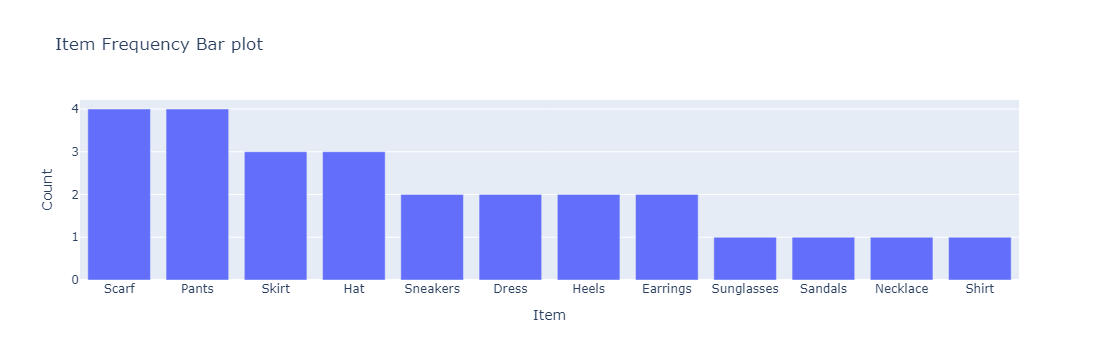

In [31]:
# Create a bar plot using Plotly
fig = px.bar(item_counts, x='Item', y='Count', title='Item Frequency Bar plot')

# Show the plot
fig.show()

#### b. Scatter Plot:

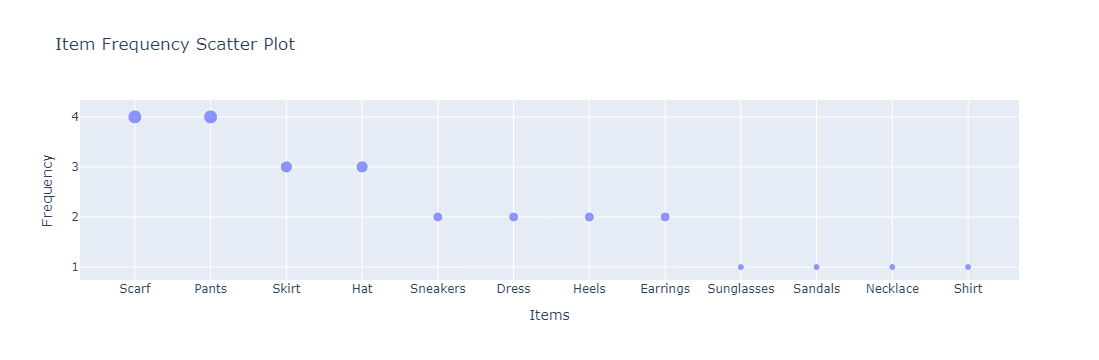

In [29]:
# Create a scatter plot using Plotly
fig_scatter = px.scatter(item_counts, x='Item', y='Count', title='Item Frequency Scatter Plot',
                          labels={'Item': 'Items', 'Count': 'Frequency'},
                          hover_name='Item', size='Count', size_max=10)

# Show the scatter plot
fig_scatter.show()

#### c. Histogram 

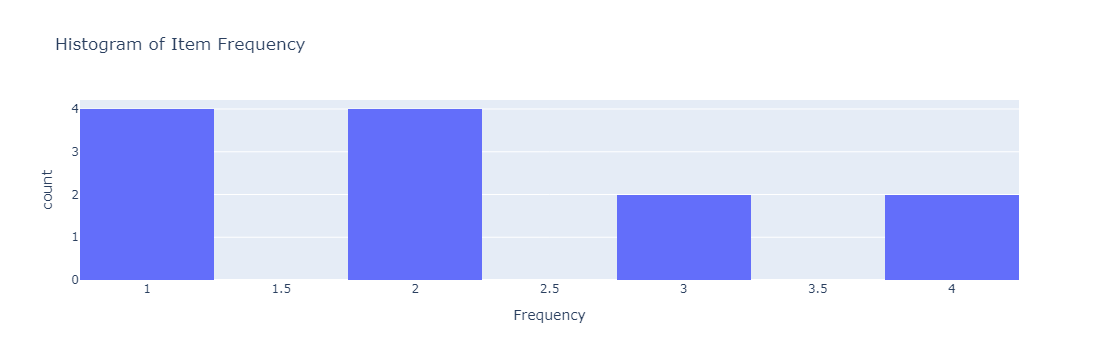

In [33]:
# Create a histogram using Plotly
fig_histogram = px.histogram(item_counts, x='Count', title='Histogram of Item Frequency', labels={'Count': 'Frequency'}, nbins=10)  # Adjust nbins as needed

# Show the histogram
fig_histogram.show()

Suggested Business Plan
1. Inventory Management
Focus on High-Frequency Items: Ensure that popular items (e.g., Scarves, Skirts, Pants) are always in stock to meet customer demand.
Adjust Inventory for Low-Selling Items: Review the inventory of less popular items to minimize overstock, possibly using sales data to make decisions on restocking.
2. Cross-Selling and Promotions
Bundle Promotions: Create bundles for items that are frequently purchased together. For example, promote a Skirt with a Scarf and Sneakers as a stylish outfit.
Seasonal Promotions: Align promotions with seasonal trends (e.g., promote Sunglasses during summer) to maximize sales.
3. Customer Engagement Strategies
Loyalty Programs: Implement loyalty programs to encourage repeat purchases. Reward customers for buying frequently together (e.g., discounts on Pants when purchasing a Shirt).
In-Store Displays: Create visually appealing displays for high-frequency items, and group complementary items together to encourage impulse buys.
4. Data-Driven Decision Making
Regular Data Analysis: Set up a system for regular analysis of sales data to identify emerging trends and adjust inventory and marketing strategies accordingly.
Feedback Mechanism: Collect customer feedback on new product introductions and promotions to refine offerings based on customer preferences.
5. Marketing Strategies
Targeted Advertising: Use insights from the correlation analysis to target advertisements for bundles of complementary items.
Social Media Campaigns: Promote high-frequency items on social media platforms to reach a broader audience, using eye-catching visuals and customer testimonials.
Conclusion
By leveraging the insights gained from the dataset through association rule mining and visualization, supermarket owners can enhance their product offerings, optimize inventory, and engage customers more effectively. Implementing these strategies should lead to increased sales, improved customer satisfaction, and a more efficient operation overall.